In [ ]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(6, 6)
idx0 = list(range(5))

prepare_5perfect_code(circ, idx0)
gateLength = len(circ.data)
circ.cx(0,5)
circ.h(5)
circ.cx(5,1)
circ.cx(5,2)
circ.h(5)
circ.cx(3,5)

ts = parse_qiskit(circ)
measList = applyFinalMeasurement(ts, 'Z', [5], 6)
# measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)

op00 = pyqreach.QOperation(["000000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(gateLength)
ts.printSupp(measList[0])

Location 17: upperBound support = 
Support vectors:
Identity operator.
Location 17: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>
Location 24: upperBound support = 
Support vectors:
Identity operator.
Location 24: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>


In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(5, 5)
idx0 = list(range(5))

prepare_5perfect_code(circ, idx0)
gateLength = len(circ.data)

ts = parse_qiskit(circ)
measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)
# measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)
oph1 = pyqreach.QOperation("H", 5, [1], [])
oph2 = pyqreach.QOperation("H", 5, [2], [])
newMeasList = []
for measLoc in measList:
    ts.addLocation(pyqreach.Location(5, 0))
    ts.addRelation(measLoc, ts.getLocationNum() - 1, oph1)
    ts.addLocation(pyqreach.Location(5, 0))
    ts.addRelation(ts.getLocationNum() - 2, ts.getLocationNum() - 1, oph2)
    newMeasList.append(ts.getLocationNum() - 1)


op00 = pyqreach.QOperation(["00000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(gateLength)
ts.printSupp(55)
visualize_transition_system(ts, 'test_decode')

Location 17: upperBound support = 
Support vectors:
Identity operator.
Location 17: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>
Location 55: upperBound support = 
Support vectors:
Identity operator.
Location 55: lowerBound support = 
Support vectors:
(0.125,0)|00000000> + (-0.125,0)|00001000> + (0.125,0)|00100000> + (-0.125,0)|00101000> + (0.125,0)|01000000> + (-0.125,0)|01001000> + (0.125,0)|01100000> + (-0.125,0)|01101000>


In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(7,7)
idx0 = list(range(7))
circ.x(6)
prepare_steane_code(circ, idx0)
ts = parse_qiskit(circ)
op00 = pyqreach.QOperation(["0000000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(ts.getLocationNum() - 1)

Location 15: upperBound support = 
Support vectors:
Identity operator.
Location 15: lowerBound support = 
Support vectors:
(0.35355,0)|00001110> + (0.35355,0)|00110010> + (0.35355,0)|01010100> + (0.35355,0)|01101000> + (0.35355,0)|10011000> + (0.35355,0)|10100100> + (0.35355,0)|11000010> + (0.35355,0)|11111110>


In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code

circ = QuantumCircuit(14, 14)

### The dealer's state
circ.initialize(0,0)
# circ.initialize(1,0)

# circ.h(0)
# circ.h(1)
# circ.h(2)
# circ.cx(0, 3)
# circ.cx(6, 4)
# circ.cx(6, 5)
# circ.cx(1, 3)
# circ.cx(0, 5)
# circ.cx(2, 3)
# circ.cx(1, 4)
# circ.cx(0, 6)
# circ.cx(2, 4)
# circ.cx(1, 6)
# circ.cx(2, 5)

prepare_steane_code(circ, list(range(7)))
circ.h(7)
prepare_steane_code(circ, list(range(7, 14)))
for i in range(7):
    circ.cx(i, 7+i)


# circ.save_statevector()

# simulater = AerSimulator(method='statevector')
# circ = transpile(circ, simulater)

# result = simulater.run(circ).result()
# sv = result.get_statevector(circ)

sv = Statevector.from_instruction(circ)

meas_bits = list(range(6, 14))
meas_result, collapsed_state = sv.measure(meas_bits)

print(meas_result)
print(collapsed_state)

01111001
Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [23]:
from IPython.display import Latex
from qiskit.visualization import state_visualization
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(sv.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code

circ = QuantumCircuit(2,2)
circ.initialize(0,0)
circ.h(0)
circ.cx(0,1)
state = Statevector.from_instruction(circ)

meas_result, collapsed_state = state.measure([1])


In [19]:
print(collapsed_state)
print(meas_result)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
0


Time taken for transpiling: 0.47 seconds


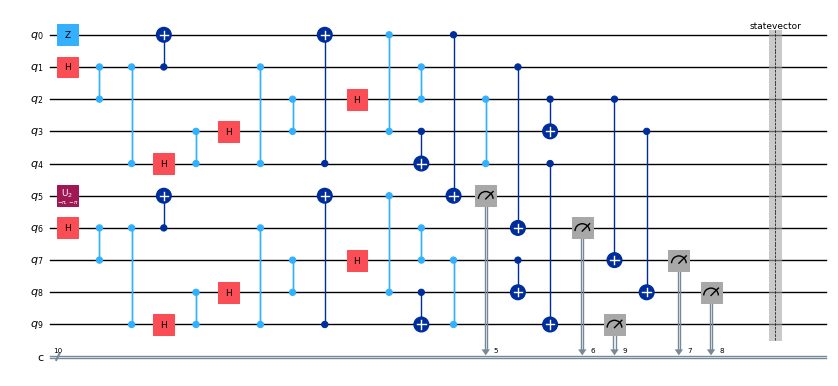

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(10, 10)

# circ.x(0)

prepare_5perfect_code(circ, [0,1,2,3,4])
gateLength = len(circ.data)

circ.h(5)
prepare_5perfect_code(circ, [5,6,7,8,9])

for i in range(5):
    circ.cx(i, 5+i)
circ.measure([5,6,7,8,9], [5,6,7,8,9])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")

circ.draw('mpl', scale=0.5, filename='test_513_bug1_circ.png')

Time taken for transpiling: 0.21 seconds


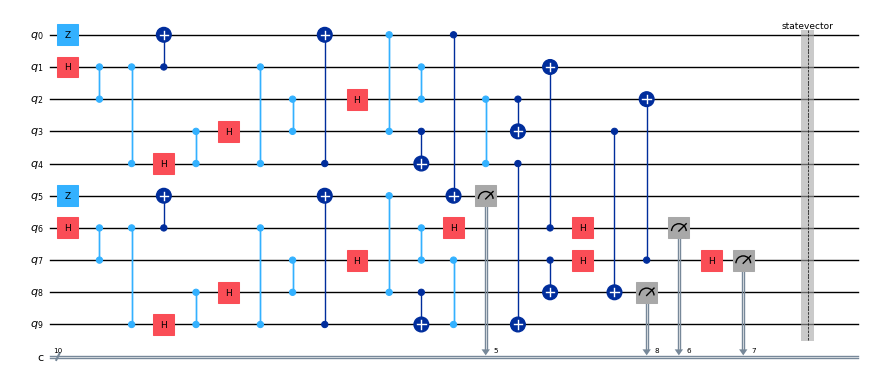

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(10, 10)

prepare_5perfect_code(circ, [0,1,2,3,4])
prepare_5perfect_code(circ, [5,6,7,8,9])

# for i in range(5):
#     circ.cx(i, 5+i)

circ.cx(0,5)
circ.h(6)
circ.cx(6,1)
circ.h(6)
circ.h(7)
circ.cx(7,2)
circ.h(7)
circ.cx(3,8)
circ.cx(4,9)

circ.measure([5,6,7,8], [5,6,7,8])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")

circ.draw('mpl', scale=0.5, filename='test_513_bug2_circ.png')

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(7, 7)

circ.x(6)
prepare_steane_code(circ, [0,1,2,3,4,5,6])

state = Statevector.from_instruction(circ)

from IPython.display import Latex
from qiskit.visualization import state_visualization
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(state.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

Time taken for transpiling: 0.20 seconds


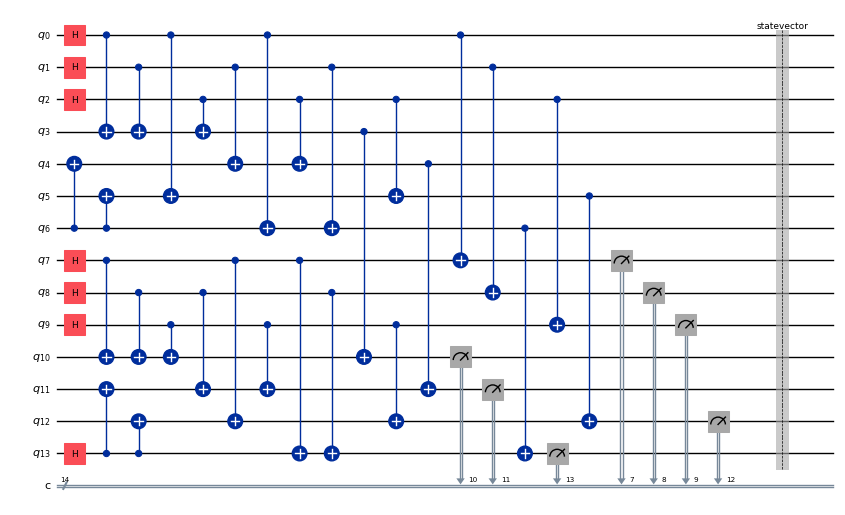

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(14, 14)

prepare_steane_code(circ, list(range(7)))
circ.h(13)
prepare_steane_code(circ, list(range(7, 14)))
for i in range(7):
    circ.cx(i, 7+i)

circ.measure([7,8,9,10,11,12,13], [7,8,9,10,11,12,13])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")
sv = result.get_statevector(circ)

circ.draw('mpl', scale=0.5, filename='test_steane_circ.png')

Time taken for transpiling: 0.04 seconds


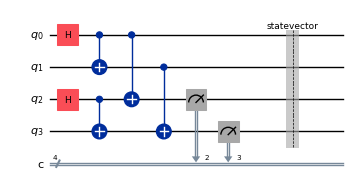

In [7]:
circ = QuantumCircuit(4,4)
circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.cx(2,3)

circ.cx(0,2)
circ.cx(1,3)
circ.measure([2,3], [2,3])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")
circ.draw('mpl', scale=0.5, filename='test_ent_circ.png')

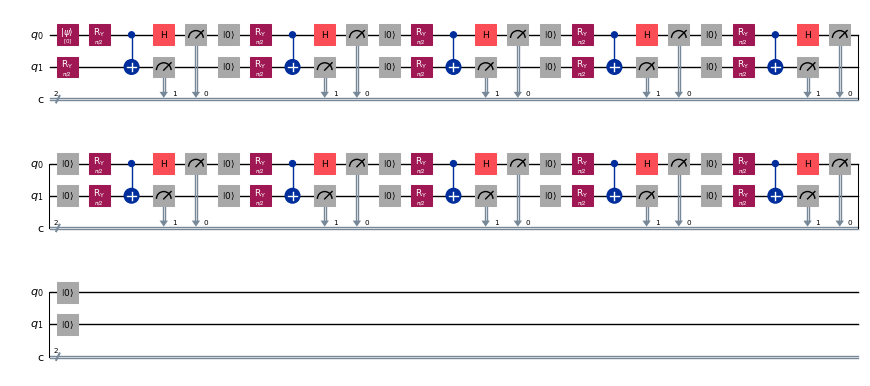

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

def p_coin(circ: QuantumCircuit, p: float, k: int):
    par = 2 * np.arccos(np.sqrt(p))
    for i in range(k):
        circ.ry(par, 0)
        circ.ry(par, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0, 0)
        circ.measure(1, 1)
        circ.reset(0)
        circ.reset(1)

circ = QuantumCircuit(2, 2)
circ.initialize(0, 0)
p_coin(circ, 0.5, 10)
circ.draw('mpl', scale=0.5)

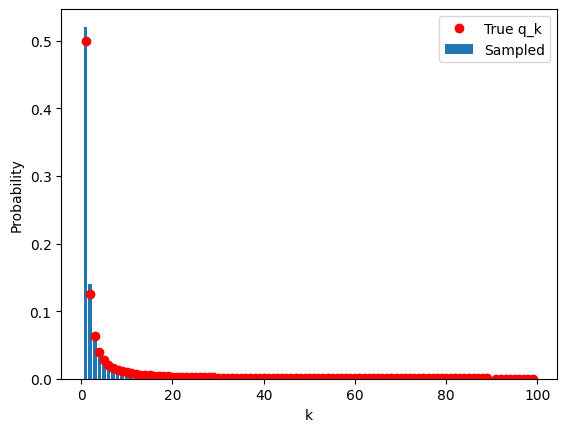

In [ ]:
import math
import random

# 计算 q_k
def q_k(k):
    comb = math.comb(2 * k, k)  # C(2k, k)
    denom = (2 * k - 1) * (2 ** (2 * k))
    return comb / denom

# 构造累积分布函数
def build_cdf(threshold=1e-10, max_k=100):
    probs = []
    cdf = []
    total = 0.0
    for k in range(1,max_k):
        prob = q_k(k)
        probs.append(prob)
        total += prob
        cdf.append(total)
        if 1 - total < threshold:
            break
    # 归一化
    cdf = [x / total for x in cdf]
    return probs, cdf

# 采样函数
def sample_from_distribution(cdf):
    r = random.random()
    for k, p in enumerate(cdf):
        if r < p:
            return k+1
    return len(cdf) - 1  # fallback in case of numerical issue

# 使用示例
probs, cdf = build_cdf()
samples = [sample_from_distribution(cdf) for _ in range(10000)]

# 可视化分布（需要matplotlib）
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(samples)
x = sorted(counter.keys())
y = [counter[i] / len(samples) for i in x]

plt.bar(x, y, label='Sampled')
plt.plot(x, [q_k(i) for i in x], 'ro', label='True q_k')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
import math
import random
from time import time

backend = Aer.get_backend('aer_simulator')
theta = 2 * np.arccos(np.sqrt(0.5))

circ = QuantumCircuit(2, 2)
circ.initialize(0,0)
circ.ry(theta, 0)
circ.ry(theta, 1)
circ.cx(0, 1)
circ.h(0)
# sv = Statevector.from_instruction(circ)

# meas_result, collapsed_state = sv.measure([0,1])
# print(f"Measured bits: {meas_result[0]}, {meas_result[1]}")

circ.measure([0,1], [0,1])

result = backend.run(circ, shots=1).result()
counts = result.get_counts()
measured = list(counts.keys())[0]  # e.g., '01', '10', '00', '11'

# Qiskit qubit顺序：从右到左，bit[0]是右边
bit0 = int(measured[-1])  # qubit 0
bit1 = int(measured[-2])  # qubit 1
print(f"Measured bits: {bit0}, {bit1}")

Measured bits: 0, 0


Measured bits: 0, 0


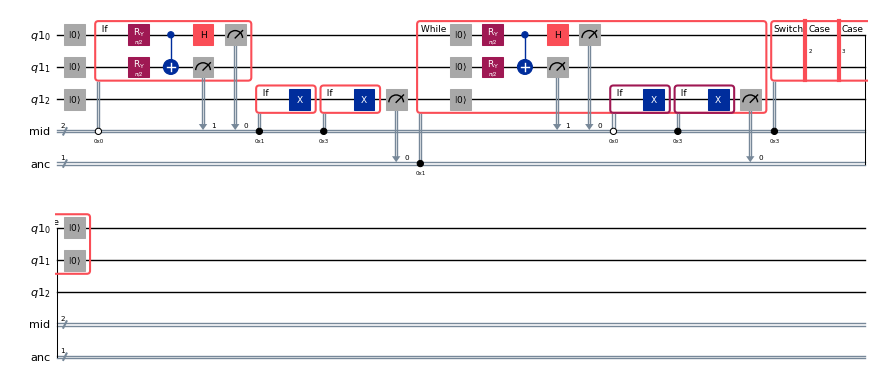

In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
import math
import random
from time import time

from parse_qiskit import *

def q_k(k):
    comb = math.comb(2 * k, k)  # C(2k, k)
    denom = (2 * k - 1) * (2 ** (2 * k))
    return comb / denom

def build_cdf(threshold=1e-10, max_k=100):
    probs = []
    cdf = []
    total = 0.0
    for k in range(1,max_k):
        prob = q_k(k)
        probs.append(prob)
        total += prob
        cdf.append(total)
        if 1 - total < threshold:
            break
    cdf = [x / total for x in cdf]
    return probs, cdf

def sample_from_distribution(cdf):
    r = random.random()
    for k, p in enumerate(cdf):
        if r < p:
            return k+1
    return len(cdf) - 1  # fallback in case of numerical issue

def p_coin_new(circ: QuantumCircuit, p: float, k: int, clbits: QuantumRegister) -> bool:
    theta = 2 * np.arccos(np.sqrt(p))

    circ.reset(0)
    circ.reset(1)
    with circ.for_loop(range(k)) as _:
        circ.ry(theta, 0)
        circ.ry(theta, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0,0)
        circ.measure(1,1)
        with circ.switch(clbits) as case:
            with case(0b00, 0b11):
                circ.reset(0)
                circ.reset(1)
            with case(0b10):
                pass
            with case(0b01):
                circ.reset(0)
                circ.reset(1)
    return True

def p_coin_qiskit(circ: QuantumCircuit, p: float, k: int, midBits: ClassicalRegister, ancBits: ClassicalRegister) -> bool:
    theta = 2 * np.arccos(np.sqrt(p))
    circ.reset(0)
    circ.reset(1)
    circ.reset(2)
    for i in range(k):
        with circ.if_test((midBits, 0b00)):
            circ.ry(theta, 0)
            circ.ry(theta, 1)
            circ.cx(0, 1)
            circ.h(0)
            circ.measure(0,0)
            circ.measure(1,1)
        with circ.if_test((midBits, 0b01)):
            circ.x(2)
        with circ.if_test((midBits, 0b11)):
            circ.x(2)
        circ.measure(2,2)
        with circ.while_loop((ancBits, 0b1)):
            circ.reset(0)
            circ.reset(1)
            circ.reset(2)
            circ.ry(theta, 0)
            circ.ry(theta, 1)
            circ.cx(0, 1)
            circ.h(0)
            circ.measure(0,0)
            circ.measure(1,1)
            with circ.if_test((midBits, 0b00)):
                circ.x(2)
            with circ.if_test((midBits, 0b11)):
                circ.x(2)
            circ.measure(2,2)
        with circ.switch(midBits) as case:
            with case(0b10):
                pass
            with case(0b11):
                circ.reset(0)
                circ.reset(1)
    return True

probs, cdf = build_cdf()
k = sample_from_distribution(cdf)
qubits = QuantumRegister(3)
clbits = ClassicalRegister(2, name='mid')
ancbits = ClassicalRegister(1, name='anc')
circ = QuantumCircuit(qubits, clbits, ancbits)
result = p_coin_qiskit(circ, 0.5, k, clbits, ancbits)
circ.draw('mpl', scale=0.5)

In [2]:
backend = Aer.get_backend('aer_simulator')
result = backend.run(circ, shots=1).result()
counts = result.get_counts()
measured = list(counts.keys())[0]  # e.g., '01', '10', '00', '11'

print(f"Measured bits: {measured[-2]}, {measured[-1]}")

Measured bits: 1, 0


In [3]:
circ.data[4].condition

(ClassicalRegister(2, 'mid'), 1)

In [6]:
circ.data[4].params[0].data == circ.data[5].params[0].data

True

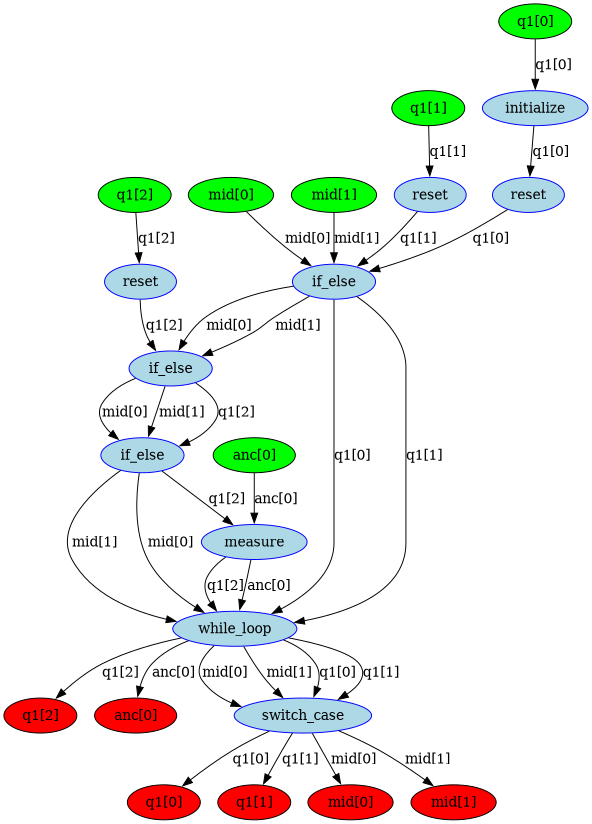

In [3]:
from qiskit.converters import circuit_to_dag
from qiskit.visualization import circuit_drawer
from qiskit.visualization.dag_visualization import dag_drawer

# Convert to DAG
dag = circuit_to_dag(circ)
dag_drawer(dag)

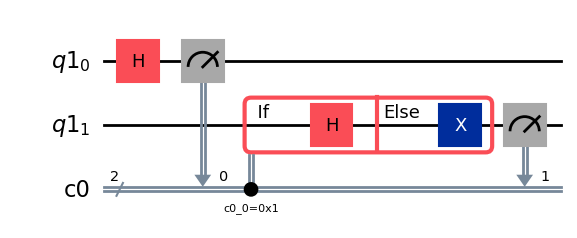

In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
import math
import random
from time import time

qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits

circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)

circuit.draw("mpl")


In [3]:
circuit.data[2].operation.condition[0]._register

ClassicalRegister(2, 'c0')

In [23]:
circuit.data[2].clbits

(Clbit(ClassicalRegister(2, 'c0'), 0),)

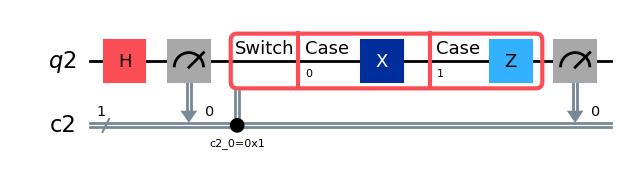

In [16]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)

circuit.draw("mpl")

# example output counts: {'1': 1024}

In [17]:
circuit.data[2]

CircuitInstruction(operation=Instruction(name='switch_case', num_qubits=1, num_clbits=1, params=[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f466e688880>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f466e688eb0>]), qubits=(Qubit(QuantumRegister(1, 'q2'), 0),), clbits=(Clbit(ClassicalRegister(1, 'c2'), 0),))

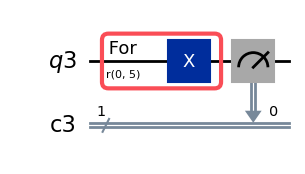

In [18]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)

circuit.draw("mpl")

# example output counts: {'1': 1024}

In [19]:
circuit.data[0]

CircuitInstruction(operation=Instruction(name='for_loop', num_qubits=1, num_clbits=0, params=[range(0, 5), None, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f466e517160>]), qubits=(Qubit(QuantumRegister(1, 'q3'), 0),), clbits=())

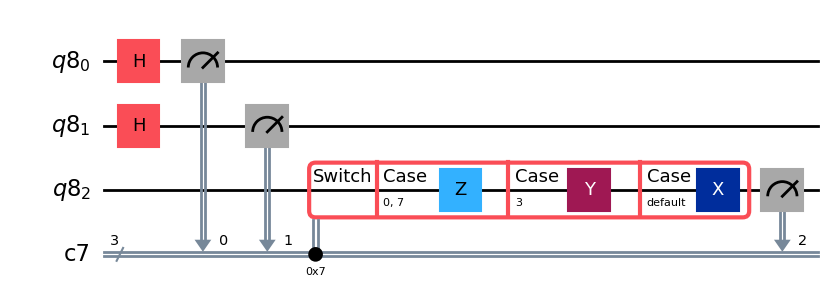

In [12]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits

circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.switch(clbits) as case:
    with case(0b000, 0b111):
        circuit.z(q2)
    with case(0b011):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 267, '110': 249, '011': 265, '000': 243}

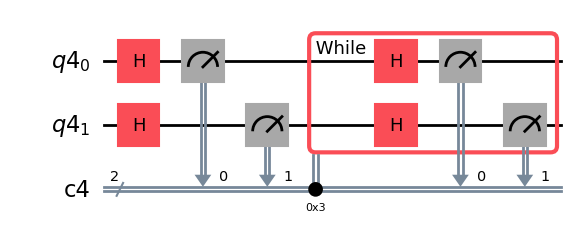

In [ ]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
import math
import random
from time import time

qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)

q0, q1 = qubits
c0, c1 = clbits

circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)

circuit.draw("mpl")

# example output counts: {'01': 334, '10': 368, '00': 322}

In [23]:
circuit.data[4]

CircuitInstruction(operation=Instruction(name='while_loop', num_qubits=2, num_clbits=2, params=[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f466e517940>]), qubits=(Qubit(QuantumRegister(2, 'q4'), 0), Qubit(QuantumRegister(2, 'q4'), 1)), clbits=(Clbit(ClassicalRegister(2, 'c4'), 0), Clbit(ClassicalRegister(2, 'c4'), 1)))

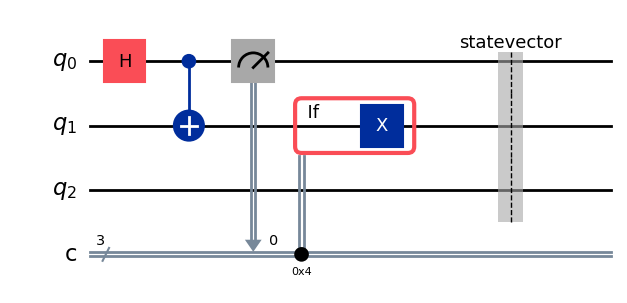

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.converters import circuit_to_dag
from qiskit.visualization import circuit_drawer
from qiskit.visualization.dag_visualization import dag_drawer
from qiskit_aer import AerSimulator
from time import time
 
# Create circuit
q = QuantumRegister(3, "q")
c = ClassicalRegister(3, "c")
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
 
# Qiskit 2.0 uses if_test instead of c_if
with circ.if_test((c, 4)):
    circ.x(q[1])
circ.save_statevector()

circuit_drawer(circ, output="mpl")



In [9]:


simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")

Time taken for transpiling: 0.02 seconds


In [10]:
sv = result.get_statevector(circ)
from IPython.display import Latex
from qiskit.visualization import state_visualization
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(sv.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

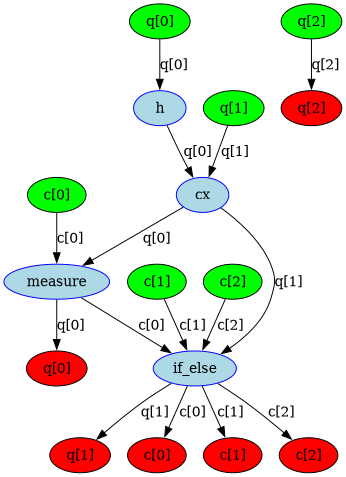

In [4]:
# Convert to DAG
dag = circuit_to_dag(circ)
dag_drawer(dag)

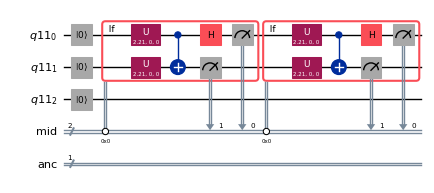

In [12]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
import math
import random
from time import time

qubits = QuantumRegister(3)
midBits = ClassicalRegister(2, name='mid')
ancBits = ClassicalRegister(1, name='anc')
circ = QuantumCircuit(qubits, midBits, ancBits)
theta = 2 * np.arccos(np.sqrt(0.2))
circ.reset([0, 1, 2])
for i in range(2):
    with circ.if_test((midBits, 0b00)):
        # circ.ry(theta, 0); circ.ry(theta, 1)
        circ.u(theta, 0, 0, 0)
        circ.u(theta, 0, 0, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0,0)
        circ.measure(1,1)
circ.draw('mpl', scale=0.5)

In [17]:
# Convert to openQASM 3
from qiskit.qasm3 import dumps
print(dumps(circ))

OPENQASM 3.0;
include "stdgates.inc";
bit[2] mid;
bit[1] anc;
qubit[3] q11;
reset q11[0];
reset q11[1];
reset q11[2];
if (mid == 0) {
  U(2.214297435588181, 0, 0) q11[0];
  U(2.214297435588181, 0, 0) q11[1];
  cx q11[0], q11[1];
  h q11[0];
  mid[0] = measure q11[0];
  mid[1] = measure q11[1];
}
if (mid == 0) {
  U(2.214297435588181, 0, 0) q11[0];
  U(2.214297435588181, 0, 0) q11[1];
  cx q11[0], q11[1];
  h q11[0];
  mid[0] = measure q11[0];
  mid[1] = measure q11[1];
}



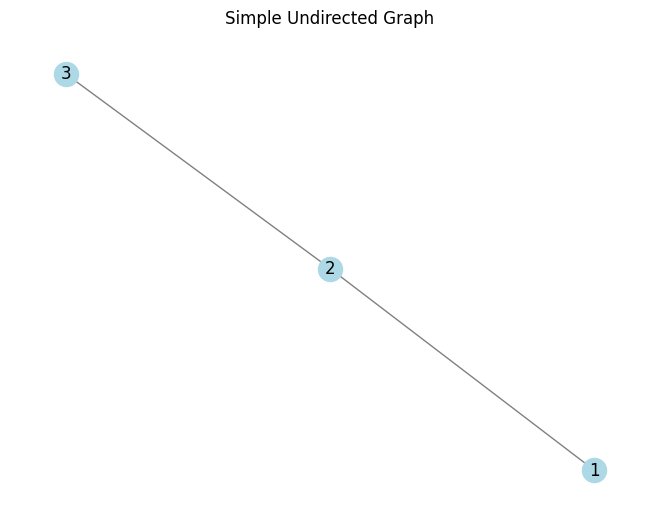

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点和边
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3)])

# 绘图
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Simple Undirected Graph")
plt.show()

In [1]:
def func(s: str=""):
    s += " world"
    print(s)

s = "hello"
func(s)
print(s)

hello world
hello


In [2]:
def func(i: int=0):
    i += 1
    print(i)
i = 0
func(i)
print(i)

1
0


In [ ]:
clReg = '10'
[int(bit) for bit in clReg]

1

In [28]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

qubits = QuantumRegister(3)
midBits = ClassicalRegister(2, name='mid')
ancBits = ClassicalRegister(1, name='anc')
circ = QuantumCircuit(qubits, midBits, ancBits)
theta = 2 * np.arccos(np.sqrt(0.2))
circ.reset([0, 1, 2])
for i in range(2):
    with circ.if_test((midBits, 0b00)):
        # circ.ry(theta, 0); circ.ry(theta, 1)
        circ.u(theta, 0, 0, 0)
        circ.u(theta, 0, 0, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0,0)
        circ.measure(1,1)
    with circ.if_test((midBits, 0b00)):
        circ.x(2)
        circ.measure(2,2)
    with circ.if_test((midBits, 0b11)):
        circ.x(2)
        circ.measure(2,2)
    with circ.while_loop((ancBits, 0b1)):
        circ.reset([0, 1, 2])
        # Necessary to re-measure qubit 2 to reset the ancBits
        circ.measure(2,2)
        # circ.ry(theta, 0); circ.ry(theta, 1)
        circ.u(theta, 0, 0, 0)
        circ.u(theta, 0, 0, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0,0)
        circ.measure(1,1)
        with circ.if_test((midBits, 0b00)):
            circ.x(2)
        with circ.if_test((midBits, 0b11)):
            circ.x(2)
        circ.measure(2,2)
    with circ.if_test((midBits, 0b10)):
        circ.reset([0, 1, 2])
        circ.measure(0,0)
        circ.measure(1,1)
        circ.measure(2,2)
print([reg.name for reg in circ.cregs])

['mid', 'anc']


Trace Description: CTL Counterexample 
Trace Type: Counterexample 
  -> State: 1.1 <-
    state = 0
    head = FALSE
    loop = FALSE
    p = FALSE
    valid = TRUE
  -> State: 1.2 <-
    state = 1
  -> State: 1.3 <-
    state = 2
  -> State: 1.4 <-
    state = 3
  -> State: 1.5 <-
    state = 4
  -> State: 1.6 <-
    state = 5
  -> State: 1.7 <-
    state = 6
  -> State: 1.8 <-
    state = 8
    p = TRUE
  -> State: 1.9 <-
    state = 11
  -> State: 1.10 <-
    state = 25
  -> State: 1.11 <-
    state = 30
  -> State: 1.12 <-
    state = 35
  -> State: 1.13 <-
    state = 339
    loop = TRUE
  -> State: 1.14 <-
    state = 1250
  -> State: 1.15 <-
    state = 1258
    loop = FALSE
  -> State: 1.16 <-
    state = 1259
  -> State: 1.17 <-
    state = 1260
    p = FALSE
  -> State: 1.18 <-
    state = 1262
  -> State: 1.19 <-
    state = 1267
  -> State: 1.20 <-
    state = 1293
  -> State: 1.21 <-
    state = 1311
  -> State: 1.22 <-
    state = 1312
  -> State: 1.23 <-
    state = 1313
  -> State: 1.24 <-
    state = 1314
  -> State: 1.25 <-
    state = 1315
  -> State: 1.26 <-
    state = 1316
  -> State: 1.27 <-
    state = 1318
  -> State: 1.28 <-
    state = 1338
  -> State: 1.29 <-
    state = 1339
  -> State: 1.30 <-
    state = 1341
  -> State: 1.31 <-
    state = 1357
  -> State: 1.32 <-
    state = 1371
  -> State: 1.33 <-
    state = 2588
    loop = TRUE
  -> State: 1.34 <-
    state = 2589
  -> State: 1.35 <-
    state = 2590
  -> State: 1.36 <-
    state = 2592
  -> State: 1.37 <-
    state = 2594
  -> State: 1.38 <-
    state = 2596
  -> State: 1.39 <-
    state = 2598
  -> State: 1.40 <-
    state = 2601
    p = TRUE
  -> State: 1.41 <-
    state = 2606
  -> State: 1.42 <-
    state = 2615
  -> State: 1.43 <-
    state = 2634
  -> State: 1.44 <-
    state = 2644
  -> State: 1.45 <-
    state = 2654
  -> State: 1.46 <-
    state = 2733
  -> State: 1.47 <-
    state = 2889
  -> State: 1.48 <-
    state = 2897
    loop = FALSE
  -> State: 1.49 <-
    state = 2898
    head = TRUE

In [29]:
[1,2,3][::-1]

[3, 2, 1]

In [47]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
import numpy as np
from time import time
from qiskit_aer import AerSimulator

from parse_qiskit import *
from qctl import *
from circ_utils import *

qubits = QuantumRegister(3)
midBits = ClassicalRegister(2, name='mid')
ancBits = ClassicalRegister(1, name='anc')
circ = QuantumCircuit(qubits, midBits, ancBits)

p = 0.4
theta = 2 * np.arccos(np.sqrt(p))
circ.u(theta, 0, 0, 0)
circ.u(theta, 0, 0, 1)
circ.cx(0, 1)
circ.h(0)
circ.measure(0,0)
circ.measure(1,1)

# Simulate the circuit for many shots to see the measurement distribution
simulater = AerSimulator(method='statevector')
circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ, shots=1000).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")
counts = result.get_counts()
print(counts)
res = counts.get('0 10', 0) / (counts.get('0 10', 0) + counts.get('0 01', 0)) if (counts.get('0 10', 0) + counts.get('0 01', 0)) > 0 else 0
print(f"Probability of 010 on condition of 010 and 001: {res}")
print(f"Probability of ideal result: {4*p*(1-p)}")
# print(f"T-test: {(res - 4*p*(1-p)) / np.sqrt(res * (1-res) / (counts.get('0 10', 0) + counts.get('0 01', 0))) if (counts.get('0 10', 0) + counts.get('0 01', 0)) > 0 else 0:.4f}")

Time taken for transpiling: 0.02 seconds
{'0 01': 15, '0 10': 469, '0 00': 516}
Probability of 010 on condition of 010 and 001: 0.96900826446281
Probability of ideal result: 0.96


如果根本就不存在11的话倒是能解释的通了，这个程序根本不会出现从00到11的问题！

In [51]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
import numpy as np
from time import time
from qiskit_aer import AerSimulator

from parse_qiskit import *
from qctl import *
from circ_utils import *

circ = QuantumCircuit(1,1)
with circ.while_loop((0, 0b0)):
    circ.x(0)
    circ.h(0)
    circ.measure(0,0)
with circ.if_test((0, 0b1)):
    circ.x(0)

# save as pdf or high dpi png
fig = circ.draw(output='mpl')

# 保存为PDF文件
fig.savefig('quantum_circuit.pdf', format='pdf', bbox_inches='tight')

# 可选：显示电路图
plt.show()


In [10]:
# Draw the circuit

import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import numpy as np
from math import pi
import random
from time import time
from parse_qiskit import *
from qctl import *
from circ_utils import *

qubits = QuantumRegister(3)
midBits = ClassicalRegister(2, name='res')
ancBits = ClassicalRegister(1, name='anc')
circ = QuantumCircuit(qubits, midBits, ancBits)
theta = 2 * np.arccos(np.sqrt(0.2))
circ.reset([0, 1, 2])

with circ.if_test((midBits, 0b00)):
    # circ.ry(theta, 0); circ.ry(theta, 1)
    circ.u(theta, 0, 0, 0)
    circ.u(theta, 0, 0, 1)
    circ.cx(0, 1)
    circ.h(0)
    circ.measure(0,0)
    circ.measure(1,1)
with circ.if_test((midBits, 0b00)):
    circ.x(2)
    circ.measure(2,2)
with circ.if_test((midBits, 0b11)):
    circ.x(2)
    circ.measure(2,2)
with circ.while_loop((ancBits, 0b1)):
    circ.reset([0, 1, 2])
    # Necessary to re-measure qubit 2 to reset the ancBits
    circ.measure(2,2)
    # circ.ry(theta, 0); circ.ry(theta, 1)
    circ.u(theta, 0, 0, 0)
    circ.u(theta, 0, 0, 1)
    circ.cx(0, 1)
    circ.h(0)
    circ.measure(0,0)
    circ.measure(1,1)
    with circ.if_test((midBits, 0b00)):
        circ.x(2)
    with circ.if_test((midBits, 0b11)):
        circ.x(2)
    circ.measure(2,2)
# with circ.if_test((midBits, 0b10)): # The first register is 0, the second is 1
#     circ.reset([0, 1, 2])
#     circ.measure(0,0)
#     circ.measure(1,1)
#     circ.measure(2,2)
style = {
    "figsize": (10, 4)   # 设置宽高
}
fig = circ.draw('mpl', fold=-1)
fig.savefig('test_p_coin_circ.pdf', format='pdf', bbox_inches='tight')

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit_aer import Aer
from qiskit.quantum_info import Operator
import numpy as np

# 用于在不同基底下测量的旋转门
def rotation_for_basis(basis):
    if basis == "Z":
        return QuantumCircuit(1)  # 不需要变换
    elif basis == "X":
        qc = QuantumCircuit(1)
        qc.h(0)  # HZH = X
        return qc
    elif basis == "B0":  # (Z+X)/√2
        qc = QuantumCircuit(1)
        qc.ry(-np.pi/4, 0)
        return qc
    elif basis == "B1":  # (Z-X)/√2
        qc = QuantumCircuit(1)
        qc.ry(np.pi/4, 0)
        return qc
    else:
        raise ValueError("Unknown basis")

# 生成 Bell 态 |Φ+>
def bell_state_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0,1)
    return qc

# 运行电路并返回期望值 E(A,B)
def expectation_value(alice_basis, bob_basis, shots=2000):
    qc = bell_state_circuit()

    # 添加测量基变换
    qc.compose(rotation_for_basis(alice_basis), [0], inplace=True)
    qc.compose(rotation_for_basis(bob_basis), [1], inplace=True)

    qc.measure_all()

    backend = Aer.get_backend("aer_simulator")
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=shots).result()
    counts = result.get_counts()

    # 计算期望值 E = sum_{ab} P(ab) * a*b
    exp = 0
    for bitstring, count in counts.items():
        # 注意Qiskit测量结果bit顺序：q1q0
        a = 1 if bitstring[-1] == "0" else -1  # Alice
        b = 1 if bitstring[-2] == "0" else -1  # Bob
        exp += a * b * (count / shots)
    return exp

# 计算 CHSH 参数
E_A0B0 = expectation_value("Z", "B0")
E_A0B1 = expectation_value("Z", "B1")
E_A1B0 = expectation_value("X", "B0")
E_A1B1 = expectation_value("X", "B1")

S = E_A0B0 + E_A0B1 + E_A1B0 - E_A1B1

print("E(A0,B0) =", E_A0B0)
print("E(A0,B1) =", E_A0B1)
print("E(A1,B0) =", E_A1B0)
print("E(A1,B1) =", E_A1B1)
print("CHSH S =", S)

if abs(S) > 2:
    print("Entanglement")
else:
    print("CHSH satisfied")

ImportError: cannot import name 'Aer' from 'qiskit' (/home/dac22/miniconda3/envs/qmc/lib/python3.10/site-packages/qiskit/__init__.py)